## Practica 1 
## Miguel Alfonso Zapata De La Cruz 

<img src= 'Practica_1.jpg' width="600px">

In [1]:
import numpy as np
import matplotlib.pyplot as mpl
from scipy.stats import norm 

## Exercise 1: Generate Distances 
### Note, we use $\Omega_{i,0}$ as O_i in ours code

In [2]:
# The matter and Lambada density parameters are 
O_m=0.3
O_L=0.7
# and we consider the value of the Hubble parameter today  and the speed of the light to be
H_0=70.0
c = 300000

### Remember that the Friedmann equation in function of the redshift is 
$$
H^2 (z) = H^2_{0} \left( \Omega_{r,0}(z+1)^4 + \Omega_{m,0} (z+1)^3 + \Omega_{k,0} (z+1)^2 + \Omega_{\Lambda , 0}  \right)
$$

in this cosmology with $ \Omega_{r,0} = \Omega_{k,0} = 0 $

### we can se that Friedmann equation $\Omega_{m} \thicksim a^{-3} $, $\Omega_{r} \thicksim a^{-4}, \; \Omega_{k} \thicksim a^{-2} \; and  \; \Omega_{\Lambda} \thicksim a^{0}$, since $\Omega_{i} = \frac{\rho_i}{\rho_c}$, whith $i =  \Lambda, \; k , \; m, \;r$ and $\rho_c$ the critical energy density.  

In [3]:
# The Hubble parameter for this cosmology is 

def H(z):
  return np.sqrt((O_m)*(z+1)**3 + O_L)**(-0.5)

# where 
z=np.arange(0,3,0.05)

## in other hand, the comoving distance is defined as $ \chi (z) =  c \int_{0}^{x} \frac{dz'}{H(z')}$

In [4]:
from scipy.integrate import quad
def chi(z):
  return (c/H_0 )*(quad(H, 0, z)[0])

## the angular and luminosity distance are 
$$
D_A = \frac{\chi(z)}{1+z}  
$$ 

$$ 
D_L = (1+z) \chi (z)
$$


In [5]:
def D_l(z):
  return (z+1)*chi(z)

def D_a(z):
  return chi(z)/(1+z)


Text(0, 0.5, 'Distance ($Gpc/h$)')

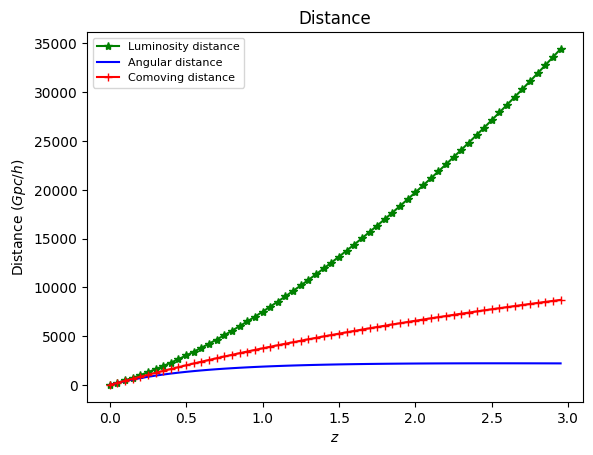

In [30]:
# The plot with the 3 distances, expressed in Gpc/h up to a redshift of 3 is 

chi = np.vectorize(chi)
mpl.plot(z,D_l(z),marker="*",color='green', label='Luminosity distance',)
mpl.plot(z,D_a(z), color='blue', label='Angular distance',)
mpl.plot(z,chi(z), marker="+",color='red', label='Comoving distance',)
mpl.legend(fontsize=8)
mpl.title('Distance')
mpl.xlabel('$z$')
mpl.ylabel('Distance ($Gpc/h$)')

## Exercise 2: Density evolution

In [7]:
# Now we introduce the new value of the density parameters
O_m2 =0.2999
O_L2= 0.7
O_r= 0.0001

# 1) In the first case, we analyze the matter and vacum iquality era, is say $\Omega_{m} = \Omega_{\Lambda} $, with the redshift from $z = 0$ to $z = 1000$. For this case we have 

$$ 
     \Omega_{m} = \Omega_{\Lambda} \rightarrow \frac{\rho_{m,0}}{\rho_c a_{eq}^3} = \frac{\rho_{\Lambda,0}}{\rho_{c}} \rightarrow a_{eq} = \left( \frac{\ \rho_{m,0}}{\rho_{\Lambda,0}}\right)^{1/3} = \left( \frac{\ \Omega_{m,0}}{\Omega_{\Lambda,0}}\right)^{1/3}  
 
$$

In [12]:
c = 1/3 
a_eq1 = (O_m2 / O_L2)**c 
print("El valor de a en la era de igualdad materia-vacio es", a_eq1)

El valor de a en la era de igualdad materia-vacio es 0.7538636598815334


### remember that the redshift is given by $a = \frac{1}{1+z}$ 

In [13]:
## thus, the redshift at the matter-vacum equality era is 

z_eq1 = 1/a_eq1 
print("The value of the redshift in this case is ", z_eq1) 

The value of the redshift in this case is  1.326499807879247


### doing the same process for the other case we obtain 


In [16]:
## Radiation-matter equality era 

a_eq2 = O_r/O_m2 
print("The matter-radiation equality value of a is ", a_eq2)

## and the redshift value is
z_eq2 = 1/a_eq2 
print("The value of the redshift in this case is ", z_eq2) 
 

The matter-radiation equality value of a is  0.0003334444814938313
The value of the redshift in this case is  2998.9999999999995


### now, we can to calculate the factor of the equivalence $z_{eq}^{\Lambda,m} / a_{eq}^{\Lambda,m} $ and $z_{eq}^{r,m} / a_{eq}^{r,m} $ 

In [23]:
f_1 = z_eq1/a_eq1 
f_2 = z_eq2/a_eq2 
print(f_1,  f_2)

1.759601740303679 8994000.999999998


### Now, we need the Friedmann equations for each era. Note that for the matter domination era ($\Omega_{k,0} = \Omega_{r,0} = \Omega_{\Lambda,0} = 0$), we obtain the equation 

$$

H^2 = H_{0}^2 ( \Omega_{m,0}(1+z)^3) = H_{0}^2 ( \Omega_{m,0} a^{-3} )
$$

### and with $H = \frac{\dot{a}}{a}$, we obtain 

$$
\dot{a} = \frac{da}{dt} = H_{0} \sqrt{\Omega_{m,0} } a^{-1/2} \rightarrow \int_{0}^{a} \sqrt{a'} da' = H_0 \sqrt{\Omega_{m,0}} \int_{0}^{t} dt'\rightarrow a^{3/2} = \frac{2}{3} H_0 \sqrt{\Omega_{m,0}} t 

$$